In [23]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
np.random.seed(1)

# Principal Component Analysis

Principal component analysis (PCA) is a form of unsupervised machine learning method. 
We can understand PCA visually with a simple two-dimensional toy example. 
A deep discussion of the mathematical underpinnings of the PCA algorithm can be found in Bro and Smilde {cite}`bro_analytical_2014`.

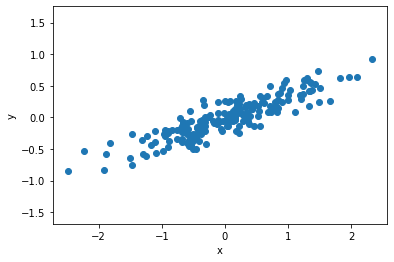

In [24]:
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

If we approach this data with [linear regression](./straight_line), then we would obtain a model that describes the values of *y* that can be obtained from a given value of *x*. 
However, in unsupervised learning, we aim to *learn about the relationship* between *x* and *y*-values. 
PCA describes this relationship through a list of principal axes in the data.
The [Scikit-Learn](https://scikit-learn.org/stable/) package includes a simple PCA estimator. 

In [25]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fitting obtains information about the components and explained variance in the data. 

In [26]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [27]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


We can visualise these as vectors over our data, where the components are the vector direction and the explained variance is the squared-length. 

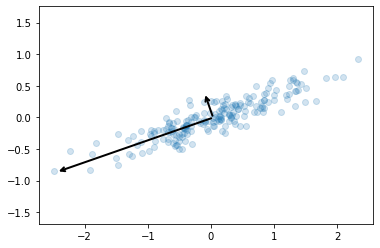

In [28]:
arrow = dict(arrowstyle='->', linewidth=2)

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrow)
plt.axis('equal')
plt.show()

These vectors are the data's principal axes and the length is an indication of the importance of the axis in describing the data (it is a measure of the variance when the data is projected onto that axis). 
We can plot the principal components, which is where each data point is projected onto the principal axes. 

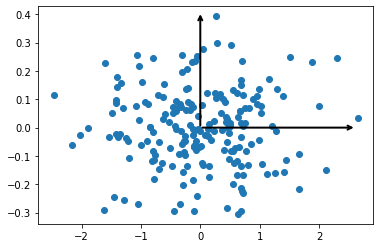

In [29]:
X_pca = pca.transform(X)
T_pca = PCA(n_components=2)
T_pca.fit(X_pca)

plt.plot(X_pca[:, 0], X_pca[:, 1], 'o')
for length, vector in zip(T_pca.explained_variance_, T_pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.annotate('', T_pca.mean_ + v, T_pca.mean_, arrowprops=arrow)
plt.show()

The PCA algorithm has some far-reaching real world applications, including assisting with data exploration and, as we will see later, in noise reduction.